# Anime Analysis 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import re
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_pickle("anime_df.pkl")
#df.to_pickle("anime_df.pkl")

In [3]:
df

,Rating,Votes,Title,Alt Title,Format,Episodes,Duration,Start Year,End Year,Studio,Tags,Description
0,9.410,73986.0,Fullmetal Alchemist: Brotherhood,Hagane no Renkinjutsushi: Full Metal Alchemist,TV,64.0,NaN,2009.0,2010.0,[Bones],"[Action, Adventure, Drama, Fantasy, Mystery, S...",The foundation of alchemy is based on the law ...
1,9.356,29247.0,your name.,Kimi no Na wa.,Movie,1.0,107.0,2016.0,2016.0,[CoMix Wave Inc.],"[Drama, Romance, Body Swapping, Opposites Attr...",Mitsuha and Taki are two total strangers livin...
2,9.334,19592.0,A Silent Voice,Koe no Katachi,Movie,1.0,130.0,2016.0,2016.0,[Kyoto Animation],"[Drama, Melancholy, School Life, Bullying, Mat...","After transferring into a new school, a deaf g..."
3,9.320,11195.0,Haikyuu!! Karasuno High School vs Shiratorizaw...,Haikyuu!! 3rd Season: Karasuno High vs. Shira...,TV,10.0,NaN,2016.0,2016.0,[Production I.G],"[Shounen, Sports, Animeism, School Club, Schoo...","Picking up where the second season ended, the ..."
4,9.296,18788.0,My Hero Academia 3,Boku no Hero Academia 3,TV,25.0,NaN,2018.0,2018.0,[Bones],"[Action, Comedy, Drama, Sci Fi, Shounen, Super...",Third season of My Hero Academia.
5,9.288,2939.0,Mob Psycho 100 II,NaN,TV,12.0,NaN,2019.0,NaN,[Bones],"[Action, Comedy, Shounen, Psychic Powers, Psyc...",Second Season of Mob Psycho 100.
6,9.274,15322.0,Haikyuu!! Second Season,NaN,TV,25.0,NaN,2015.0,2016.0,[Production I.G],"[Shounen, Sports, School Club, School Life, To...","After losing to Aoba Johsai at the Inter-High,..."
7,9.266,5375.0,Gintama Kanketsu-hen: Yorozuya yo Eien Nare,Gintama The Movie: The Final Chapter - Be Fore...,Movie,1.0,111.0,2013.0,2013.0,[Sunrise],"[Action, Comedy, Drama, Sci Fi, Shounen, Alien...","While watching a movie, Gintoki comes upon a ""..."
8,9.264,29623.0,My Hero Academia 2,Boku no Hero Academia 2,TV,25.0,NaN,2017.0,2017.0,[Bones],"[Action, Comedy, Drama, Sci Fi, Shounen, Schoo...",In a world where eighty percent of the populat...
9,9.262,6192.0,Gintama (2015),Gintama°,TV,51.0,NaN,2015.0,2016.0,[BN Pictures],"[Action, Comedy, Drama, Sci Fi, Shounen, Alien...",Fourth season of Gintama.


In [4]:
df['Votes'].min()

10.0

In [7]:
df.isnull().sum()

Rating         2717
Votes          2717
Title             0
Alt Title      7482
Format            0
Episodes        387
Duration       5342
Start Year      187
End Year        343
Studio         3724
Tags            338
Description    5298
dtype: int64

In [8]:
df['Format'].value_counts()

TV             4215
Movie          2279
OVA            1971
Web            1129
Music Video    1124
DVD Special     776
Other           646
TV Special      541
Name: Format, dtype: int64

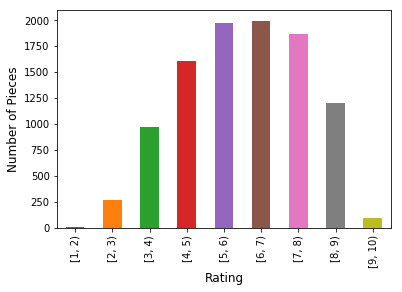

In [10]:
bins = range(1, 11)
ax = pd.cut(list(df['Rating']), bins, right=False).value_counts().plot(kind='bar')
ax.set_xlabel('Rating', fontsize=12)
_ = ax.set_ylabel('Number of Pieces', fontsize=12)

In [16]:
def contains (col, elems):
    booleans = []
    for tags in df[col]:
        exists = True
        for item in elems:
            if type(tags) == float:
                exists = False
            elif item not in tags:
                exists = False
        if type(tags) == float:
            booleans.append(False)                   
        elif exists:
            booleans.append(True)
        else:
            booleans.append(False)
    return booleans

#### Plot relationship between movie duration and rating

In [22]:
df

,Rating,Votes,Title,Alt Title,Format,Episodes,Duration,Start Year,End Year,Studio,Tags,Description
0,9.410,73986.0,Fullmetal Alchemist: Brotherhood,Hagane no Renkinjutsushi: Full Metal Alchemist,TV,64.0,NaN,2009.0,2010.0,[Bones],"[Action, Adventure, Drama, Fantasy, Mystery, S...",The foundation of alchemy is based on the law ...
1,9.356,29247.0,your name.,Kimi no Na wa.,Movie,1.0,107.0,2016.0,2016.0,[CoMix Wave Inc.],"[Drama, Romance, Body Swapping, Opposites Attr...",Mitsuha and Taki are two total strangers livin...
2,9.334,19592.0,A Silent Voice,Koe no Katachi,Movie,1.0,130.0,2016.0,2016.0,[Kyoto Animation],"[Drama, Melancholy, School Life, Bullying, Mat...","After transferring into a new school, a deaf g..."
3,9.320,11195.0,Haikyuu!! Karasuno High School vs Shiratorizaw...,Haikyuu!! 3rd Season: Karasuno High vs. Shira...,TV,10.0,NaN,2016.0,2016.0,[Production I.G],"[Shounen, Sports, Animeism, School Club, Schoo...","Picking up where the second season ended, the ..."
4,9.296,18788.0,My Hero Academia 3,Boku no Hero Academia 3,TV,25.0,NaN,2018.0,2018.0,[Bones],"[Action, Comedy, Drama, Sci Fi, Shounen, Super...",Third season of My Hero Academia.
5,9.288,2939.0,Mob Psycho 100 II,NaN,TV,12.0,NaN,2019.0,NaN,[Bones],"[Action, Comedy, Shounen, Psychic Powers, Psyc...",Second Season of Mob Psycho 100.
6,9.274,15322.0,Haikyuu!! Second Season,NaN,TV,25.0,NaN,2015.0,2016.0,[Production I.G],"[Shounen, Sports, School Club, School Life, To...","After losing to Aoba Johsai at the Inter-High,..."
7,9.266,5375.0,Gintama Kanketsu-hen: Yorozuya yo Eien Nare,Gintama The Movie: The Final Chapter - Be Fore...,Movie,1.0,111.0,2013.0,2013.0,[Sunrise],"[Action, Comedy, Drama, Sci Fi, Shounen, Alien...","While watching a movie, Gintoki comes upon a ""..."
8,9.264,29623.0,My Hero Academia 2,Boku no Hero Academia 2,TV,25.0,NaN,2017.0,2017.0,[Bones],"[Action, Comedy, Drama, Sci Fi, Shounen, Schoo...",In a world where eighty percent of the populat...
9,9.262,6192.0,Gintama (2015),Gintama°,TV,51.0,NaN,2015.0,2016.0,[BN Pictures],"[Action, Comedy, Drama, Sci Fi, Shounen, Alien...",Fourth season of Gintama.


In [23]:
df.corr()

,Rating,Votes,Episodes,Duration
Rating,1.000000,0.404422,0.043744,0.474435
Votes,0.404422,1.000000,0.082555,0.310673
Episodes,0.043744,0.082555,1.000000,-0.064012
Duration,0.474435,0.310673,-0.064012,1.000000


In [24]:
df.loc[df['Format'] == 'Movie'].corr()

,Rating,Votes,Episodes,Duration
Rating,1.000000,0.368592,NaN,0.674744
Votes,0.368592,1.000000,NaN,0.292181
Episodes,NaN,NaN,NaN,NaN
Duration,0.674744,0.292181,NaN,1.000000


#### Strong correlation!!

0.6747436971220776


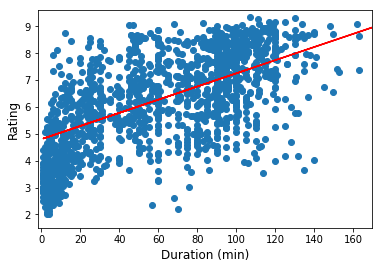

In [33]:
plt.scatter(df.loc[df['Format'] == 'Movie', 'Duration'], df.loc[df['Format'] == 'Movie', 'Rating'])
m = df.loc[df['Format'] == 'Movie', 'Duration'].corr(df.loc[df['Format'] == 'Movie', 'Rating'])

linear_regressor = LinearRegression()  # create object for the class
mean_dur = df.loc[df['Format'] == 'Movie', 'Duration'].mean()
mean_rat = df.loc[df['Format'] == 'Movie', 'Rating'].mean()
linear_regressor.fit(df.loc[df['Format'] == 'Movie', 'Duration'].fillna(value=mean_dur).values.reshape(-1, 1), df.loc[df['Format'] == 'Movie', 'Rating'].fillna(value=mean_rat).values.reshape(-1, 1))  # perform linear regression
Y_pred = linear_regressor.predict(df.loc[df['Format'] == 'Movie', 'Duration'].fillna(value=mean_dur).values.reshape(-1, 1))  # make predictions

plt.plot(df.loc[df['Format'] == 'Movie', 'Duration'].fillna(value=mean_dur).values.reshape(-1, 1), Y_pred, color='red')
plt.xlim(-2, 170)
plt.ylim(1.5, 9.6)
plt.xlabel('Duration (min)', fontsize=12)
plt.ylabel('Rating', fontsize=12)
print(m)

In [26]:
def labelsFromBins(bins, left='[', sep=',', right=')'):
    labels = []
    for i in range(len(bins) - 1):
        label = left + str(bins[i]) + sep + str(bins[i + 1]) + right
        labels.append(label)
    return labels

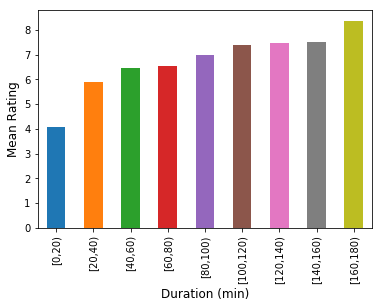

In [35]:
bins = range(0, 200, 20)
def durSplitter(df, ind):
    if df.loc[ind, 'Duration'] == np.NaN:
        return 'Null'
    for i in bins:
        if df.loc[ind, 'Duration'] >= i and df.loc[ind, 'Duration'] < (i + 20):
            return '[' + str(i) + ',' + str(i + 20) + ')'


ax = df.loc[df['Format'] == 'Movie'].groupby(lambda x: durSplitter(df, x))['Rating'].mean().sort_values().plot(kind='bar')
ax.set_xlabel('Duration (min)', fontsize=12)
ax.set_ylabel('Mean Rating', fontsize=12)
_ = ax.set_xticklabels(labelsFromBins(bins))

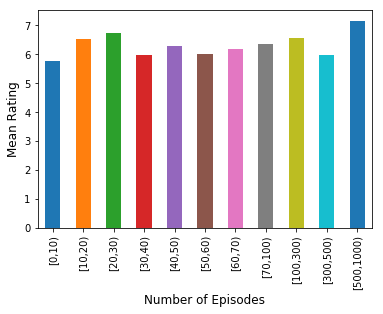

In [37]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 100, 300, 500, 1000]
def epsSplitter(df, ind):
    if df.loc[ind, 'Episodes'] == np.NaN:
        return 'Null'
    for i in range(len(bins) - 1):
        if df.loc[ind, 'Episodes'] >= bins[i] and df.loc[ind, 'Episodes'] < bins[i + 1]:
            return bins[i + 1]

ax = df.loc[df['Format'] == 'TV'].groupby(lambda x: epsSplitter(df, x))['Rating'].mean().plot(kind='bar')
ax.set_xlabel('Number of Episodes', fontsize=12)
ax.set_ylabel('Mean Rating', fontsize=12)
_ = ax.set_xticklabels(labelsFromBins(bins))

### Find relationship between tags and rating

In [40]:
def listTags(tag_col):
    uniq_tags = []
    for tag_row in tag_col:
        if type(tag_row) != float:
            for each in tag_row:
                if each not in uniq_tags:
                    uniq_tags.append(each)
    return uniq_tags

In [41]:
tags = listTags(df['Tags'])

In [42]:
len(tags)

468

In [43]:
%%time
tag_count = {tag: 0 for tag in tags}

for row in df['Tags']:
    if type(row) != float:
        for tag in row:
            tag_count[tag] += 1
            
tag_list = list(tag_count.keys())
count_list = list(tag_count.values())

CPU times: user 18.3 ms, sys: 785 µs, total: 19.1 ms
Wall time: 18.4 ms


In [44]:
count_list

[2702,
 1368,
 1262,
 2273,
 346,
 1696,
 45,
 314,
 110,
 422,
 52,
 3397,
 1071,
 11,
 17,
 1099,
 842,
 1512,
 83,
 43,
 146,
 27,
 492,
 45,
 233,
 178,
 15,
 3402,
 2008,
 151,
 522,
 90,
 173,
 330,
 173,
 141,
 175,
 117,
 15,
 51,
 107,
 217,
 351,
 63,
 49,
 51,
 287,
 264,
 271,
 20,
 17,
 73,
 78,
 22,
 678,
 117,
 115,
 83,
 34,
 26,
 64,
 26,
 898,
 978,
 23,
 209,
 114,
 87,
 46,
 226,
 88,
 47,
 390,
 16,
 254,
 159,
 155,
 108,
 135,
 31,
 252,
 76,
 34,
 154,
 75,
 14,
 5,
 1544,
 759,
 229,
 17,
 350,
 52,
 262,
 91,
 26,
 616,
 663,
 106,
 323,
 34,
 198,
 60,
 76,
 59,
 15,
 431,
 13,
 44,
 43,
 83,
 156,
 221,
 174,
 53,
 11,
 70,
 12,
 47,
 19,
 107,
 106,
 366,
 12,
 50,
 23,
 387,
 14,
 11,
 37,
 25,
 33,
 54,
 13,
 41,
 156,
 41,
 31,
 8,
 138,
 41,
 63,
 9,
 27,
 86,
 14,
 25,
 255,
 38,
 40,
 55,
 35,
 22,
 19,
 182,
 21,
 63,
 150,
 8,
 27,
 13,
 104,
 99,
 51,
 207,
 12,
 64,
 272,
 6,
 34,
 142,
 74,
 44,
 122,
 75,
 47,
 36,
 59,
 18,
 73,
 30,
 133,
 16,

In [46]:
tag_list

['Action',
 'Adventure',
 'Drama',
 'Fantasy',
 'Mystery',
 'Shounen',
 'Conspiracy',
 'Military',
 'Siblings',
 'Violence',
 'Animal Abuse',
 'Based on a Manga',
 'Romance',
 'Body Swapping',
 'Opposites Attract',
 'School Life',
 'Supernatural',
 'Original Work',
 'Melancholy',
 'Bullying',
 'Mature Themes',
 'Suicide',
 'Sports',
 'Animeism',
 'School Club',
 'Tournaments',
 'Volleyball',
 'Comedy',
 'Sci Fi',
 'Superheroes',
 'Superpowers',
 'Psychic Powers',
 'Psychological',
 'Aliens',
 'Feudal Japan',
 'Samurai',
 'Swordplay',
 'Time Travel',
 'Weak to Strong',
 'Breaking the Fourth Wall',
 'Crude',
 'Gag',
 'Parody',
 'Slapstick',
 'LGBT Themes',
 'Thriller',
 'Based on a Visual Novel',
 'Monsters',
 'Horror',
 'Isolated Society',
 'Mind Games',
 'noitaminA',
 'Orphans',
 'Outside World',
 'Mecha',
 'Overpowered Main Characters',
 'Political',
 'Real Robot',
 'Rebellions',
 'Rivalries',
 'Royalty',
 'Terrorism',
 'Seinen',
 'Slice of Life',
 'Board Games',
 'Episodic',
 'Iyashi

In [47]:
tag_count

{'Action': 2702,
 'Adventure': 1368,
 'Drama': 1262,
 'Fantasy': 2273,
 'Mystery': 346,
 'Shounen': 1696,
 'Conspiracy': 45,
 'Military': 314,
 'Siblings': 110,
 'Violence': 422,
 'Animal Abuse': 52,
 'Based on a Manga': 3397,
 'Romance': 1071,
 'Body Swapping': 11,
 'Opposites Attract': 17,
 'School Life': 1099,
 'Supernatural': 842,
 'Original Work': 1512,
 'Melancholy': 83,
 'Bullying': 43,
 'Mature Themes': 146,
 'Suicide': 27,
 'Sports': 492,
 'Animeism': 45,
 'School Club': 233,
 'Tournaments': 178,
 'Volleyball': 15,
 'Comedy': 3402,
 'Sci Fi': 2008,
 'Superheroes': 151,
 'Superpowers': 522,
 'Psychic Powers': 90,
 'Psychological': 173,
 'Aliens': 330,
 'Feudal Japan': 173,
 'Samurai': 141,
 'Swordplay': 175,
 'Time Travel': 117,
 'Weak to Strong': 15,
 'Breaking the Fourth Wall': 51,
 'Crude': 107,
 'Gag': 217,
 'Parody': 351,
 'Slapstick': 63,
 'LGBT Themes': 49,
 'Thriller': 51,
 'Based on a Visual Novel': 287,
 'Monsters': 264,
 'Horror': 271,
 'Isolated Society': 20,
 'Mind